# GeoPandas demo



In [1]:
%matplotlib inline

import pandas as pd

import geopandas
from shapely.geometry import Point, Polygon

pd.options.display.max_rows = 10

## Read and write GIS file formats

GeoPandas can read and write many different GIS file formats by relying on the `fiona` library (which is an interface to GDAL/OGR).

For example, let's start by reading a GeoJSON file about the administrative districts in Paris (https://opendata.paris.fr/explore/dataset/quartier_paris/) and some real-time information about the public bicycle sharing system in Paris (vélib, https://opendata.paris.fr/explore/dataset/stations-velib-disponibilites-en-temps-reel/information/):

In [2]:
stations = geopandas.read_file("stations-velib-disponibilites-en-temps-reel.geojson")

In [3]:
stations[['status', 'name', 'bike_stands', 'available_bikes', 'geometry']].head()

I am densified (5 elements)
I am densified (5 elements)


,status,name,bike_stands,available_bikes,geometry
0,OPEN,14002 - RASPAIL QUINET,44,4,POINT (2.32955509721 48.8391991672)
1,OPEN,20503 - COURS DE VINCENNES PYRÉNÉES,21,3,POINT (2.40590731702 48.847724969)
2,OPEN,20011 - PYRÉNÉES-DAGORNO,21,0,POINT (2.40516852064 48.855501354)
3,CLOSED,31008 - VINCENNES (MONTREUIL),56,0,POINT (2.43736866129 48.857702134)
4,OPEN,43006 - MINIMES (VINCENNES),28,27,POINT (2.43079345113 48.8414868563)


In [4]:
quartiers = geopandas.read_file("quartier_paris.geojson")

In [5]:
quartiers.head()

I am densified (5 elements)
I am densified (5 elements)


,n_sq_qu,perimetre,objectid,longueur,c_qu,surface,n_sq_ar,c_quinsee,l_qu,c_ar,geometry
0,750000047,6155.005036,29,6154.591387,47,1.902932e+06,750000012,7511203,Bercy,12,"POLYGON ((2.391141037839471 48.82611264577471,..."
1,750000001,5057.549475,41,5057.332772,1,8.690007e+05,750000001,7510101,St-Germain-l'Auxerrois,1,"POLYGON ((2.344593389828428 48.85404991486192,..."
2,750000076,4435.273252,79,4435.143641,76,1.294988e+06,750000019,7511904,Combat,19,"POLYGON ((2.388343313526396 48.88056667377272,..."
3,750000065,5264.597082,68,5264.463406,65,1.465071e+06,750000017,7511701,Ternes,17,"POLYGON ((2.295039618663717 48.87377869547587,..."
4,750000010,2139.625388,50,2139.535591,10,2.717503e+05,750000003,7510302,Enfants-Rouges,3,"POLYGON ((2.367101341254551 48.86162755885409,..."


In [6]:
print(quartiers[['objectid', 'c_qu', 'l_qu', 'c_ar', 'geometry']].head().to_html(notebook=True))

I am densified (5 elements)
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>objectid</th>
      <th>c_qu</th>
      <th>l_qu</th>
      <th>c_ar</th>
      <th>geometry</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>29</td>
      <td>47</td>
      <td>Bercy</td>
      <td>12</td>
      <td>POLYGON ((2.391141037839471 48.82611264577471,...</td>
    </tr>
    <tr>
      <th>1</th>
      <td>41</td>
      <td>1</td>
      <td>St-Germain-l'Auxerrois</td>
      <td>1</td>
      <td>POLYGON ((2.344593389828428 48.85404991486192,...</td>
    </tr>
    <tr>
      <th>2</th>
      <td>79</td>
      <td>76</td>
      <td>Combat</td>
      <td>19</td>
      <td>POLYGON ((2.38834331

## What's a GeoDataFrame and GeoSeries?

- `GeoDataFrame` is a DataFrame which has a 'geometry' column. The `.geometry` attribute returns a GeoSeries (the column name itself is not necessarily 'geometry')
- `GeoSeries` is a Series that holds (shapely) geometry objects (Points, LineStrings, Polygons, ...)

In [7]:
type(stations)

geopandas.geodataframe.GeoDataFrame

In [8]:
stations.geometry

I am densified (10 elements)


0       POINT (2.32955509721 48.8391991672)
1        POINT (2.40590731702 48.847724969)
2        POINT (2.40516852064 48.855501354)
3        POINT (2.43736866129 48.857702134)
4       POINT (2.43079345113 48.8414868563)
                       ...                 
1221    POINT (2.38257893505 48.8448673196)
1222     POINT (2.35634514417 48.821039287)
1223    POINT (2.33141820471 48.8589429862)
1224    POINT (2.27854960082 48.8274705017)
1225    POINT (2.32524904508 48.8662852212)
Name: geometry, Length: 1226, dtype: object

In [9]:
type(stations.geometry)

geopandas.geoseries.GeoSeries

In [10]:
type(stations.geometry[0])

shapely.geometry.point.Point

## It's still a DataFrame

We still have our pandas functionality that we can use on the geospatial dataset (e.g. boolean filtering).

In [11]:
stations = stations[stations['status'] == 'OPEN'].copy()

A histogram showing the distribution of the number of bike stands in the stations:

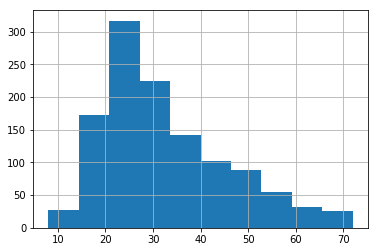

In [12]:
stations['bike_stands'].hist()

## But now has access to spatial predicates and operations

For example, we can access the area of the different quartiers:

In [13]:
quartiers.geometry.area

0     0.000233
1     0.000107
2     0.000159
3     0.000180
4     0.000033
        ...   
75    0.000035
76    0.000132
77    0.000169
78    0.000098
79    0.000093
Length: 80, dtype: float64

Or calculate the distance from a certain point to all the bike stations.

I used `geopy` to localize the Notre Dame:

```python
>>> from geopy.geocoders import Nominatim
>>> geolocator = Nominatim()
>>> location = geolocator.geocode("Notre Dame Paris")
>>> notre_dame = Point(location.longitude, location.latitude)
>>> print(notre_dame)
POINT (2.35005149954546 48.85293695)
```

In [14]:
notre_dame = Point(2.35005149954546, 48.85293695)

In [16]:
stations.distance(notre_dame)

0       0.024674
1       0.056098
2       0.055177
4       0.081550
5       0.070769
          ...   
1221    0.033513
1222    0.032513
1223    0.019577
1224    0.075902
1225    0.028166
Length: 1186, dtype: float64

Or check in which quartier the Notre Dame is located:

In [17]:
quartiers.contains(notre_dame)

0     False
1     False
2     False
3     False
4     False
      ...  
75    False
76    False
77    False
78    False
79    False
Length: 80, dtype: bool

In [18]:
quartiers[quartiers.contains(notre_dame)]

I am densified (1 elements)
I am densified (1 elements)


,n_sq_qu,perimetre,objectid,longueur,c_qu,surface,n_sq_ar,c_quinsee,l_qu,c_ar,geometry
5,750000016,3283.163371,56,3282.999717,16,378252.153674,750000004,7510404,Notre-Dame,4,"POLYGON ((2.361313701339139 48.84858030437791,..."


Many spatial predicates and operations:

- Predicates: contains, covers, crosses, intersects, equals, overlaps, touches, within
- Operations: difference, intersection, union, buffer, distance, length, area, interpolate, project, relate, 


## Visualize your geospatial data

GeoPandas allows you to quickly visualize your geometries:

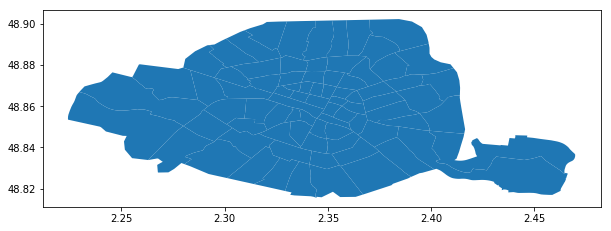

In [19]:
quartiers.plot(figsize=(10, 10))

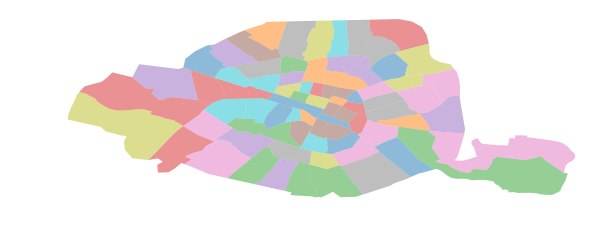

In [20]:
ax = quartiers.plot(figsize=(10, 10), cmap='tab10', alpha=0.5)
ax.set_axis_off()

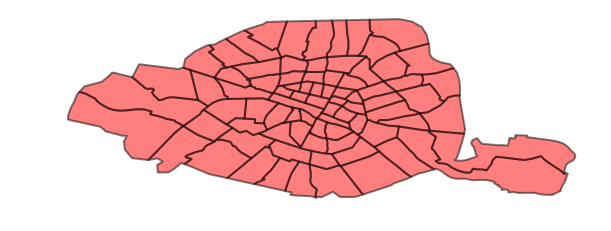

In [21]:
ax = quartiers.plot(figsize=(10, 10), edgecolor='k',
                    facecolor='r', alpha=0.5, linewidth=2)
ax.set_axis_off()

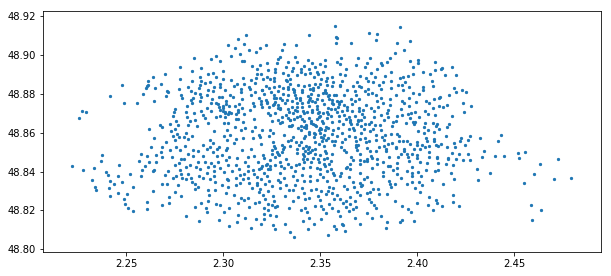

In [22]:
stations.plot(markersize=5, figsize=(10, 10))

It would be nice to add the street network to the figure above. Therefore, I downloaded, using the `osmnx` package, the openstreetmap network for Paris, and saved it as a shapefile:

    import osmnx as ox
    G = ox.graph_from_place('Paris, France', network_type='drive')
    ox.save_graph_shapefile(G, 'openstreetmap_paris', folder='.')

In [23]:
streets = geopandas.read_file("openstreetmap_paris/edges/")

In [24]:
streets.head()

I am densified (5 elements)
I am densified (5 elements)


,access,bridge,from,highway,key,lanes,length,maxspeed,name,oneway,osmid,ref,service,to,tunnel,width,geometry
0,None,None,1245546489,primary,0,None,10.441171286969725,50,Boulevard MacDonald,True,191694881,None,None,442371,None,None,"LINESTRING (2.3711204 48.8987287, 2.3710461 48..."
1,None,None,442371,primary,0,4,218.52200148977164,50,Boulevard MacDonald,False,13859914,None,None,209141276,None,None,"LINESTRING (2.3711204 48.8987287, 2.3713436 48..."
2,None,None,442371,primary,0,None,60.98775515463154,50,Boulevard MacDonald,True,178237238,None,None,1886061102,None,None,"LINESTRING (2.3711204 48.8987287, 2.3709746 48..."
3,None,None,442371,primary,0,None,111.87478765505494,None,Avenue de la Porte d'Aubervilliers,True,19923111,None,None,3805263959,None,None,"LINESTRING (2.3711204 48.8987287, 2.3711267 48..."
4,None,None,1760247812,residential,0,None,44.238688986210406,None,Villa des Lyanes,False,164380899,None,None,1760247816,None,None,"LINESTRING (2.4051359 48.863424, 2.4054913 48...."


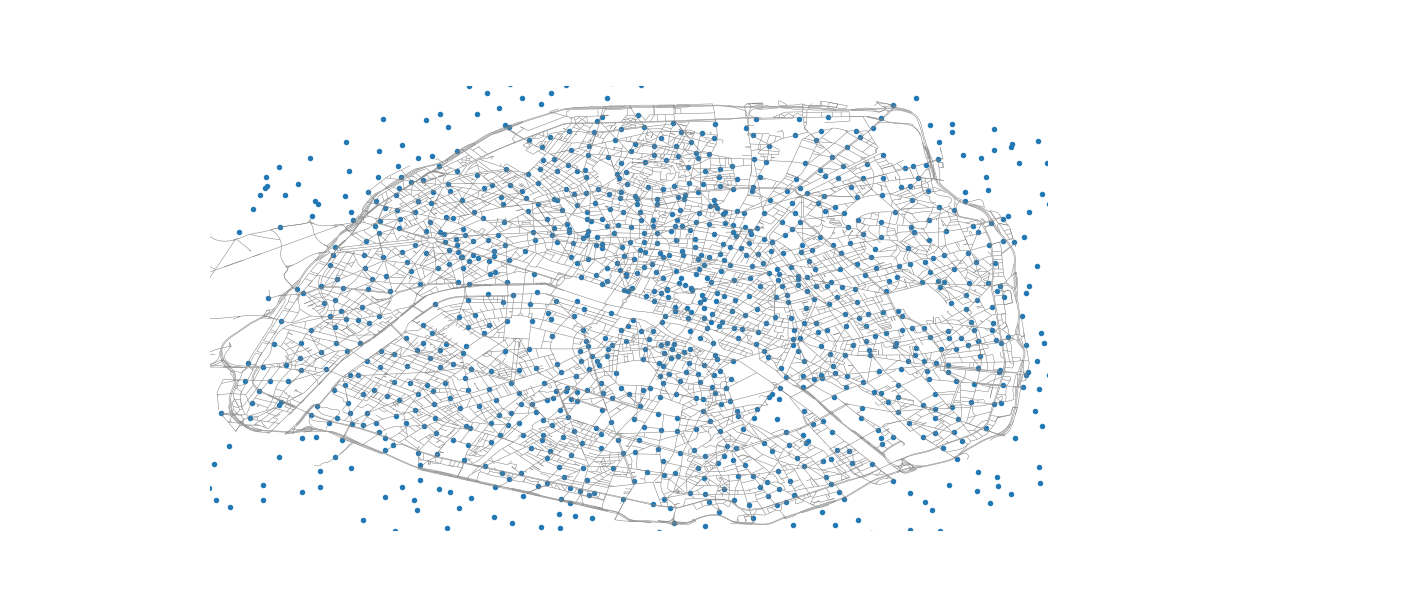

In [25]:
ax = streets.plot(linewidth=0.5, color='grey', figsize=(15, 10))
stations.plot(ax=ax, markersize=20)
ax.set(xlim=(2.25, 2.42), ylim=(48.815, 48.905));
ax.set_axis_off()

### Color the plot based on values

By specifying the `column` keyword, we can color the geometries based on the values of that column:

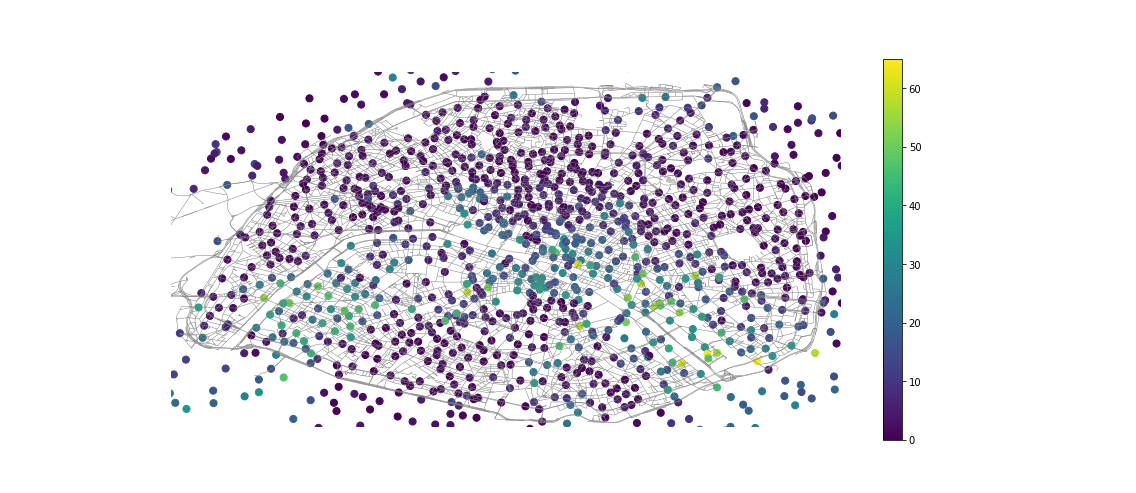

In [26]:
ax = streets.plot(linewidth=0.5, color='grey', figsize=(15, 7))
stations.plot(ax=ax, column='available_bikes',
              markersize=50, legend=True)
ax.set(xlim=(2.25, 2.42), ylim=(48.815, 48.905));
ax.set_axis_off()

Or based on categorical values:

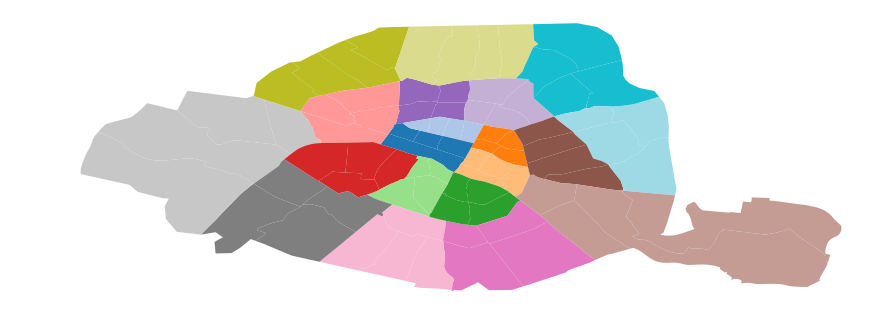

In [27]:
ax = quartiers.plot(column='n_sq_ar', categorical=True,
                    cmap='tab20', figsize=(15, 8))
ax.set_axis_off()

## Spatial joins

GeoPandas includes functionality to perform spatial joins and overlays (`sjoin` and `overlay`).

Here, let's do a spatial join to determine the quartier in which each bike station is located.

In [28]:
stations = geopandas.sjoin(stations,
                           quartiers[['l_qu', 'geometry']].copy(),
                           op='within')

In [29]:
stations.head()

I am densified (5 elements)
I am densified (5 elements)


,status,contract_name,name,bonus,bike_stands,number,last_update,available_bike_stands,banking,available_bikes,address,l_qu,index_right,geometry
1213,OPEN,Paris,12043 - DAUMESNIL HEBRARD,False,40,12043,2017-08-26T17:45:33,2,True,38,"108, avenue Daumesnil - 75012 PARIS",Bercy,0,POINT (2.38474 48.8429)
809,OPEN,Paris,12105 - BERCY VILLOT,False,35,12105,2017-08-26T17:44:30,2,True,33,153 RUE DE BERCY - 75012 PARIS,Bercy,0,POINT (2.37660562531 48.8419071533)
626,OPEN,Paris,12109 - CHAROLAIS,False,30,12109,2017-08-26T17:43:23,19,True,11,212 RUE DE CHARENTON - 75012 PARIS,Bercy,0,POINT (2.38756433493 48.8408694597)
69,OPEN,Paris,12024 - GARE DE BERCY,False,35,12024,2017-08-26T17:38:03,0,True,33,GARE DE BERCY - ANGLE RUE CORBINEAU - 75012 PARIS,Bercy,0,POINT (2.38241 48.83976)
993,OPEN,Paris,12026 - PARC DE BERCY,False,36,12026,2017-08-26T17:45:14,2,True,34,61 RUE DE BERCY - 75012 PARIS,Bercy,0,POINT (2.38221733705 48.837721459)


In [30]:
counts = stations.groupby('l_qu').size()

In [34]:
quartiers = geopandas.GeoDataFrame(quartiers.merge(counts.reset_index(name='number_bike_stations')))

TypeError: values must be a GeometryArray object

In [32]:
quartiers.head()

,n_sq_qu,perimetre,objectid,longueur,c_qu,surface,n_sq_ar,c_quinsee,l_qu,c_ar,geometry,number_bike_stations
0,750000047,6155.005036,29,6154.591387,47,1.902932e+06,750000012,7511203,Bercy,12,"POLYGON ((2.391141037839471 48.82611264577471,...",9
1,750000001,5057.549475,41,5057.332772,1,8.690007e+05,750000001,7510101,St-Germain-l'Auxerrois,1,"POLYGON ((2.344593389828428 48.85404991486192,...",4
2,750000076,4435.273252,79,4435.143641,76,1.294988e+06,750000019,7511904,Combat,19,"POLYGON ((2.388343313526396 48.88056667377272,...",13
3,750000065,5264.597082,68,5264.463406,65,1.465071e+06,750000017,7511701,Ternes,17,"POLYGON ((2.295039618663717 48.87377869547587,...",18
4,750000010,2139.625388,50,2139.535591,10,2.717503e+05,750000003,7510302,Enfants-Rouges,3,"POLYGON ((2.367101341254551 48.86162755885409,...",3


AttributeError: 'numpy.ndarray' object has no attribute 'geom_type'

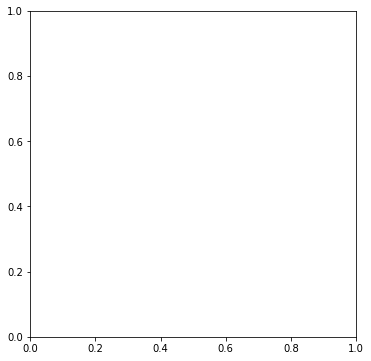

In [33]:
ax = quartiers.plot(column='number_bike_stations', figsize=(15, 6),
                    legend=True)
ax.set_axis_off()

In [ ]:
quartiers['number_bike_stations_relative'] = (
    quartiers['number_bike_stations'] / quartiers.geometry.area)

In [ ]:
ax = quartiers.plot(column='number_bike_stations_relative',
                    figsize=(15, 6))
ax.set_axis_off()

## Coordinate reference systems

A GeoDataFrame or GeoSeries has a `.crs` attribute which holds (optionally) a description of the coordinate reference system of the geometries:

In [ ]:
stations.crs

In [ ]:
stations.geometry.head(3)

We can convert this to another reference system using the `to_crs` function. 
For example, let's convert it to the UTM 31U zone reference system (http://epsg.io/32631) which unit is metres.

In [ ]:
stations2 = stations.to_crs(epsg=32631)
# or 
# stations.to_crs("+proj=utm +zone=31 +ellps=WGS84 +datum=WGS84 +units=m +no_defs ")

In [ ]:
stations2.geometry.head(3)

In [ ]:
quartiers2 = quartiers.to_crs(epsg=32631)

In [ ]:
(quartiers2.geometry.area / 1000**2)

## Interactive Leaflet.js maps with `folium`

In [ ]:
import folium

In [ ]:
m = folium.Map([48.8566, 2.3429], zoom_start=12, tiles="OpenStreetMap")
m.choropleth(geo_str=quartiers.to_json(), data=quartiers, columns=['objectid', 'number_bike_stations_relative'],
             key_on='feature.properties.objectid', fill_color='BuGn', highlight=True)

In [ ]:
m

## Urban Atlas data

Urban Atlas is providing pan-European comparable land use and land cover data for Large Urban Zones (http://www.eea.europa.eu/data-and-maps/data/urban-atlas)

The data file for Paris is rather big, so I cutted a subset for the center of Paris and saved that again as a shapefile:

```python
urban_atlas_full = geopandas.read_file('/fr001l_paris', vfs='zip:///.../fr001l_paris.zip')
x, y = 3760000, 2890000
us_subset = urban_atlas_full.cx[x-8000 : x+8000, y-8000 : y+8000].copy()
area = Polygon([(x-8000, y-8000), (x+8000, y-8000), (x+8000, y+8000), (x-8000, y+8000)])
us_subset['geometry'] = us_subset.geometry.intersection(area)
us_subset.to_file("fr001l_paris.shp")
```

In [ ]:
us = geopandas.read_file("fr001l_paris.shp")

In [ ]:
us.head()

In [ ]:
us.crs

In [ ]:
ax = us.plot(figsize=(20,20))
ax.set_axis_off()

In [ ]:
ax = us.plot(column='ITEM', figsize=(20,20), legend=True, cmap='tab20')
ax.set_axis_off()

In [ ]:
pd.options.display.max_rows = 60

In [ ]:
us.ITEM.value_counts()

In [ ]:
us.groupby('ITEM')['geometry'].agg(lambda x: x.area.sum()).sort_values(ascending=False)

In [ ]:
us[us.ITEM == 'Green urban areas'].geometry.area.hist(bins=np.arange(0, 1000000, 50000))